In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from keras.optimizers import Adam
from keras.utils import to_categorical

In [7]:
df = pd.read_csv("/Users/minsu/Desktop/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

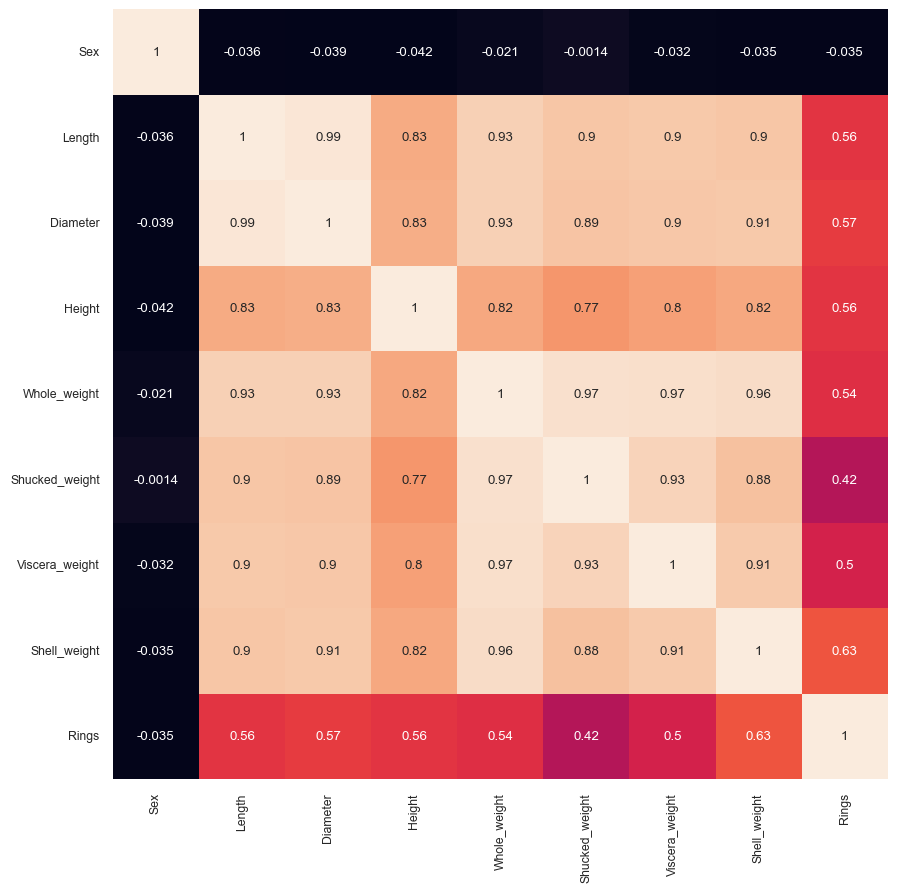

In [13]:
import matplotlib.pyplot as plt
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [15]:
def categorize_rings(rings):
    if rings <= 8:
        return 0  # young
    elif 9 <= rings <= 10:
        return 1  # middle-aged
    else:
        return 2  # old

In [17]:
df['category'] = df['Rings'].apply(categorize_rings)

# 특성(X)과 레이블(y) 분리
X = df[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']].values
y = df['category'].values

In [21]:
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [24]:
y

array([2, 0, 1, ..., 1, 1, 2])

In [26]:
y = to_categorical(y, 3)

In [28]:
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
X_scaled = np.expand_dims(X_scaled, axis=1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [44]:
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64, return_sequences=False),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax'),
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,139 (106.01 KB)

 Trainable params: 27,139 (106.01 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30


2024-09-25 15:35:45.900744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5543 - loss: 0.9599 - val_accuracy: 0.5710 - val_loss: 0.8556
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6293 - loss: 0.8232 - val_accuracy: 0.6143 - val_loss: 0.8194
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6304 - loss: 0.7836 - val_accuracy: 0.6472 - val_loss: 0.7774
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6664 - loss: 0.7405 - val_accuracy: 0.6577 - val_loss: 0.7591
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6529 - loss: 0.7355 - val_accuracy: 0.6457 - val_loss: 0.7592
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6663 - loss: 0.7259 - val_accuracy: 0.6442 - val_loss: 0.7607
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6749 - loss: 0.7253 - val_accuracy: 0.6457 - val_loss: 0.7506
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6778 - loss: 0.7179 - val_accuracy: 0.6517 - val_loss: 0.

In [50]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Loss: {test_loss:.2f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6499 - loss: 0.7083
Test Accuracy: 0.63
Test Loss: 0.75


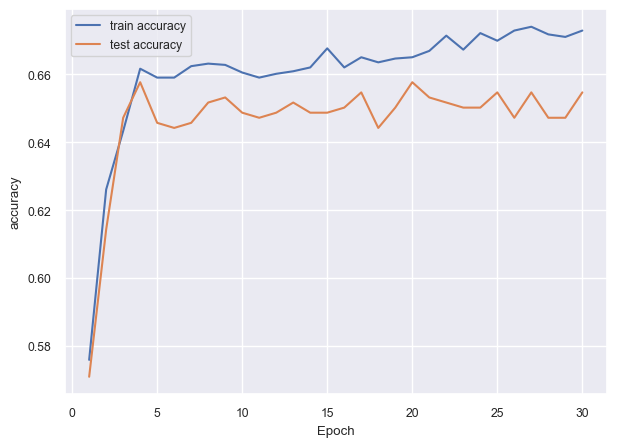

In [52]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, accuracy, label='train accuracy')
plt.plot(epochs, val_accuracy, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

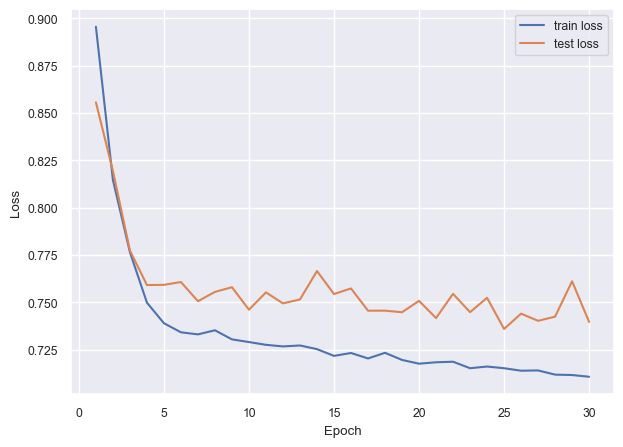

In [54]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 성능 개선
BatchNomalization, Dropout, LearningRate

In [56]:
from keras.layers import BatchNormalization
from keras.callbacks import ReduceLROnPlateau

# LSTM 모델 개선
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    
    # 첫 번째 LSTM 레이어
    LSTM(64, return_sequences=True),
    BatchNormalization(),  # 배치 정규화 추가
    Dropout(0.3),  # Dropout 추가
    
    # 두 번째 LSTM 레이어
    LSTM(32, return_sequences=False),
    BatchNormalization(),  # 배치 정규화 추가
    Dropout(0.3),
    
    # Dense 레이어
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    # 출력 레이어
    Dense(3, activation='softmax'),
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 64)          │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,843 (140.01 KB)

 Trainable params: 35,651 (139.26 KB)

 Non-trainable params: 192 (768.00 B)

In [58]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

In [60]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[reduce_lr])

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.4805 - loss: 1.0851 - val_accuracy: 0.4574 - val_loss: 1.0855 - learning_rate: 0.0010
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5794 - loss: 0.8902 - val_accuracy: 0.5232 - val_loss: 1.0591 - learning_rate: 0.0010
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6220 - loss: 0.8359 - val_accuracy: 0.5785 - val_loss: 1.0191 - learning_rate: 0.0010
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6334 - loss: 0.8157 - val_accuracy: 0.6457 - val_loss: 0.9500 - learning_rate: 0.0010
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6016 - loss: 0.8692 - val_accuracy: 0.6398 - val_loss: 0.8761 - learning_rate: 0.0010
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6431 - loss: 0.8017 - val_accuracy: 0.6562 - val_loss: 0.8141 - learning_rate: 0.0010
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6142 - loss: 0.8266 - val_acc

In [62]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Loss: {test_loss:.2f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6580 - loss: 0.7034
Test Accuracy: 0.64
Test Loss: 0.74


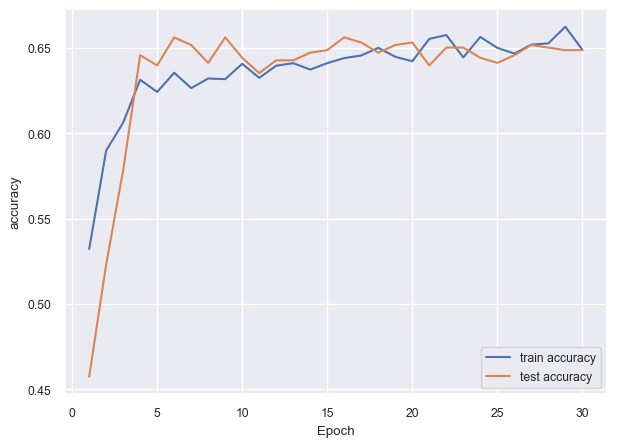

In [64]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, accuracy, label='train accuracy')
plt.plot(epochs, val_accuracy, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

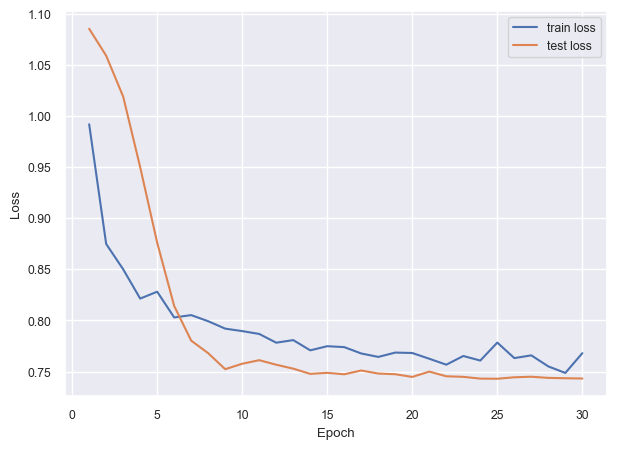

In [66]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Dropout 강도 조절

In [68]:
from keras.layers import BatchNormalization
from keras.callbacks import ReduceLROnPlateau

# LSTM 모델 개선
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    
    # 첫 번째 LSTM 레이어
    LSTM(64, return_sequences=True),
    BatchNormalization(),  # 배치 정규화 추가
    Dropout(0.2),  # Dropout 추가
    
    # 두 번째 LSTM 레이어
    LSTM(32, return_sequences=False),
    BatchNormalization(),  # 배치 정규화 추가
    Dropout(0.2),
    
    # Dense 레이어
    Dense(128, activation='relu'),
    Dropout(0.3),
    
    # 출력 레이어
    Dense(3, activation='softmax'),
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 1, 64)          │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,843 (140.01 KB)

 Trainable params: 35,651 (139.26 KB)

 Non-trainable params: 192 (768.00 B)

In [70]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[reduce_lr])

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.4257 - loss: 1.1265 - val_accuracy: 0.4619 - val_loss: 1.0832 - learning_rate: 1.0000e-04
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5573 - loss: 0.9497 - val_accuracy: 0.4709 - val_loss: 1.0599 - learning_rate: 1.0000e-04
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5977 - loss: 0.8852 - val_accuracy: 0.5187 - val_loss: 1.0208 - learning_rate: 1.0000e-04
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5920 - loss: 0.8905 - val_accuracy: 0.5366 - val_loss: 0.9557 - learning_rate: 1.0000e-04
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5868 - loss: 0.8860 - val_accuracy: 0.5650 - val_loss: 0.8845 - learning_rate: 1.0000e-04
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6155 - loss: 0.8613 - val_accuracy: 0.6099 - val_loss: 0.8297 - learning_rate: 1.0000e-04
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6204 

In [72]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Loss: {test_loss:.2f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6649 - loss: 0.7120
Test Accuracy: 0.63
Test Loss: 0.75


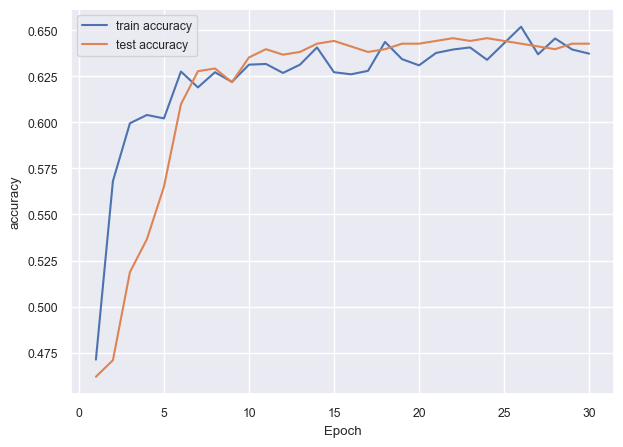

In [74]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, accuracy, label='train accuracy')
plt.plot(epochs, val_accuracy, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

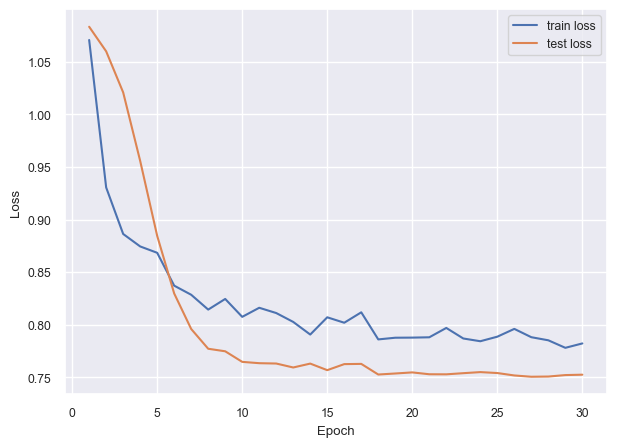

In [76]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# LSTM LAYER 추가

In [82]:
from keras.layers import BatchNormalization
from keras.callbacks import ReduceLROnPlateau

model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),

    LSTM(128, return_sequences=True),
    BatchNormalization(), 
    Dropout(0.2),
    
    LSTM(64, return_sequences=True),
    BatchNormalization(), 
    Dropout(0.2),
    
    LSTM(32, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(128, activation='relu'),
    Dropout(0.3),
    
    Dense(3, activation='softmax'),
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 1, 128)         │        69,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 1, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 1, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,963 (535.01 KB)

 Trainable params: 136,515 (533.26 KB)

 Non-trainable params: 448 (1.75 KB)

In [84]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[reduce_lr])

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.4241 - loss: 1.1672 - val_accuracy: 0.3692 - val_loss: 1.0948 - learning_rate: 1.0000e-04
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5366 - loss: 0.9690 - val_accuracy: 0.4096 - val_loss: 1.0854 - learning_rate: 1.0000e-04
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5535 - loss: 0.9400 - val_accuracy: 0.4709 - val_loss: 1.0612 - learning_rate: 1.0000e-04
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5859 - loss: 0.8784 - val_accuracy: 0.5665 - val_loss: 1.0120 - learning_rate: 1.0000e-04
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5856 - loss: 0.8695 - val_accuracy: 0.6413 - val_loss: 0.9174 - learning_rate: 1.0000e-04
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6028 - loss: 0.8632 - val_accuracy: 0.6368 - val_loss: 0.8354 - learning_rate: 1.0000e-04
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6188 

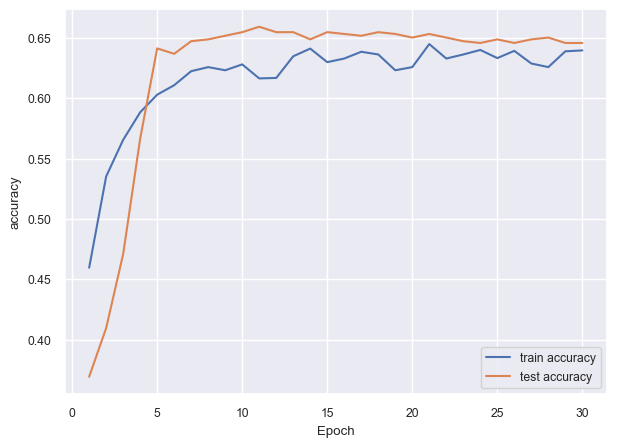

In [85]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, accuracy, label='train accuracy')
plt.plot(epochs, val_accuracy, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

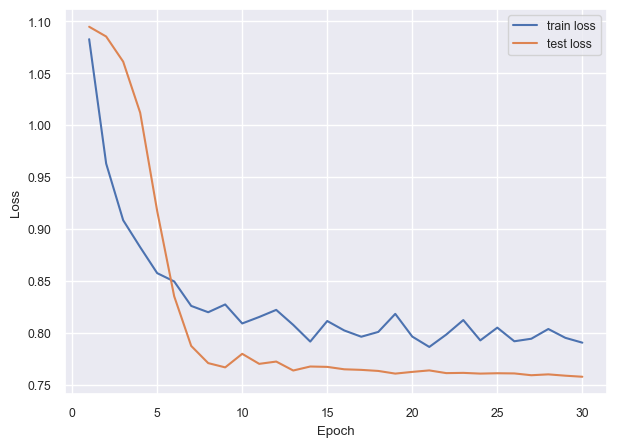

In [86]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [91]:
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),

    LSTM(128, return_sequences=True),
    BatchNormalization(), 
    Dropout(0.2),
    
    LSTM(64, return_sequences=True),
    BatchNormalization(), 
    Dropout(0.2),
    
    LSTM(32, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(128, activation='relu'),
    Dropout(0.3),
    
    Dense(3, activation='softmax'),
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2, callbacks=[reduce_lr])

Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.3308 - loss: 1.2878 - val_accuracy: 0.3438 - val_loss: 1.0969 - learning_rate: 1.0000e-04
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4927 - loss: 1.0408 - val_accuracy: 0.3438 - val_loss: 1.0943 - learning_rate: 1.0000e-04
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5175 - loss: 1.0013 - val_accuracy: 0.3438 - val_loss: 1.0891 - learning_rate: 1.0000e-04
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5714 - loss: 0.9243 - val_accuracy: 0.3438 - val_loss: 1.0805 - learning_rate: 1.0000e-04
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5762 - loss: 0.9198 - val_accuracy: 0.3468 - val_loss: 1.0683 - learning_rate: 1.0000e-04
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5927 - loss: 0.8684 - val_accuracy: 0.3812 - val_loss: 1.0496 - learning_rate: 1.0000e-04
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6110 

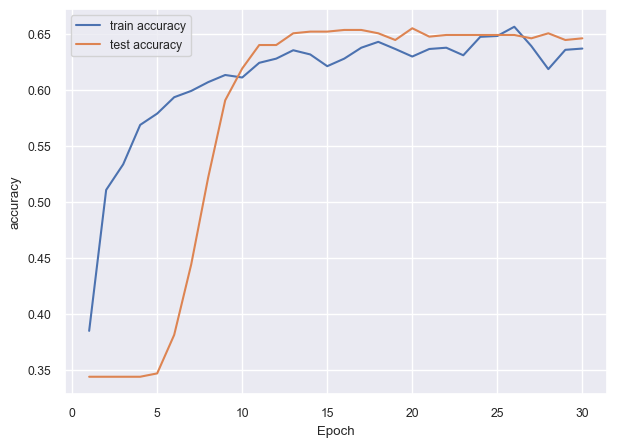

In [93]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, accuracy, label='train accuracy')
plt.plot(epochs, val_accuracy, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

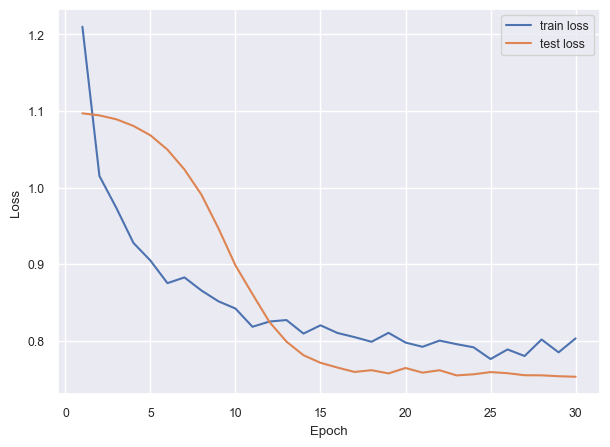

In [95]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [97]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[reduce_lr])

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6309 - loss: 0.7995 - val_accuracy: 0.6442 - val_loss: 0.7540 - learning_rate: 2.5000e-05
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6342 - loss: 0.7997 - val_accuracy: 0.6472 - val_loss: 0.7561 - learning_rate: 2.5000e-05
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6439 - loss: 0.7703 - val_accuracy: 0.6487 - val_loss: 0.7548 - learning_rate: 2.5000e-05
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6198 - loss: 0.7812 - val_accuracy: 0.6487 - val_loss: 0.7544 - learning_rate: 2.5000e-05
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6337 - loss: 0.8035 - val_accuracy: 0.6502 - val_loss: 0.7546 - learning_rate: 1.2500e-05
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6523 - loss: 0.7729 - val_accuracy: 0.6502 - val_loss: 0.7545 - learning_rate: 1.2500e-05
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6420 

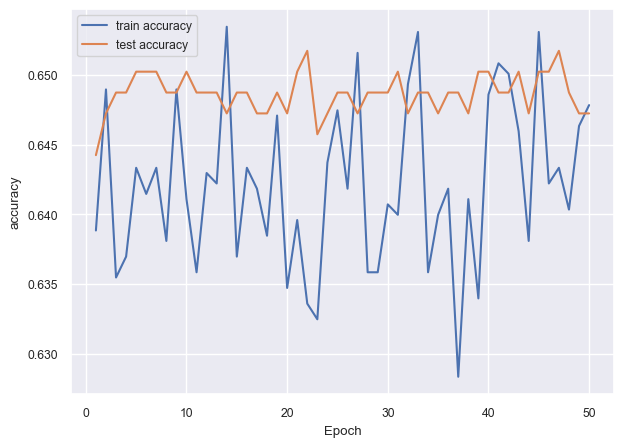

In [99]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, accuracy, label='train accuracy')
plt.plot(epochs, val_accuracy, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

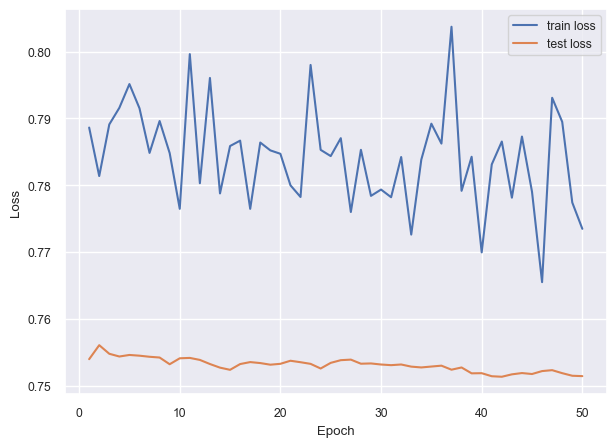

In [101]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()